<a href="https://colab.research.google.com/github/codestates/ds-sc13x/blob/master/sc13x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC13x Linear Algebra

## 1. $\vec{c} \cdot \vec{d}$ 를 구해보세요. 이 두 개의 vector는 orthogonal 관계 (직교)에 있나요? 왜 그런가요? 왜 아닌가요?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [1]:
import numpy as np
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])
np.dot(c,d)
# 벡터는 직교 관계에 있지 않고, 벡터의 내적 결과값이 0이 안나왔기 때문이다.

42

## 2. $E^{-1}$ 와 $E^{T}$ 를 구하세요.

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [2]:
e = [[7,4,2],[1,3,-1],[2,6,-4]]
# 역행렬
np.linalg.inv(e)

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [3]:
# 전치행렬
np.transpose(e)

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

## 3. $|F|$ 를 구하세요. 이 데이터는 어떤 의미가 있나요?

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [4]:
f = [[2, -2, 5],[4, 1, 10],[12, 6, 30]]
#np.linalg.inv(f)
# F 는 Singular 매트릭스이며, 2개의 행 혹은 열이 선형의 관계를 이루고 있음. (역행렬 = 계산불가)
# |F| 는 벡터의 절대값..? 
np.abs(f)

array([[ 2,  2,  5],
       [ 4,  1, 10],
       [12,  6, 30]])

## 4. 다음 데이터의 covariance, correlation을 구하세요.

- x = [820, 760, 1250, 990, 1080, 1450, 1600]

- y = [0, 1, 7, 1, 0, 6, 4]

In [5]:
x = [820, 760, 1250, 990, 1080, 1450, 1600]
y = [0, 1, 7, 1, 0, 6, 4]
# covariance
np.cov(x,y)

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

In [6]:
# correlation
np.corrcoef(x,y)

array([[1.        , 0.72846346],
       [0.72846346, 1.        ]])

## 5. 다음 데이터를 정규화 하세요.

아래 링크를 참조하세요.

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [7]:
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)
Ct = df.Country.values.tolist()
df = df.drop(['Country'],axis=1)


from sklearn.preprocessing import StandardScaler  #라이브러리 호출
x = df.loc[:,df.columns].values
dfsd = StandardScaler().fit_transform(x)
df = pd.DataFrame(dfsd, columns=df.columns) #Array 형태 데이터프레임으로 변환

df['Country'] = Ct
df

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery,Country
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303,England
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122,Wales
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837,Scotland
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656,North Ireland


## 6. 위 데이터에 PCA 를 적용 후 scatterplot을 그리세요.

In [8]:
from sklearn.decomposition import PCA #PCA
import matplotlib.pyplot as plt

# 과제 2 - 3 : PCA (n_components = 2, pc1, pc2)
pca = PCA(n_components = 2)
pcacomp = pca.fit_transform(x)
pcadf = pd.DataFrame(data = pcacomp, columns = ['pc1','pc2'])

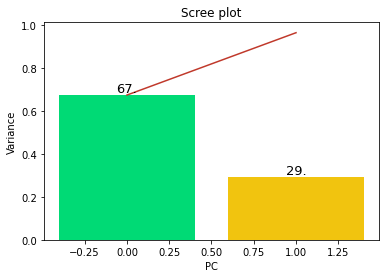

In [9]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(pca)

In [10]:
pcadf

,pc1,pc2
0,-144.993152,-2.532999
1,-240.529148,-224.646925
2,-91.869339,286.081786
3,477.391639,-58.901862


In [11]:
df.Country

0          England
1            Wales
2         Scotland
3    North Ireland
Name: Country, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


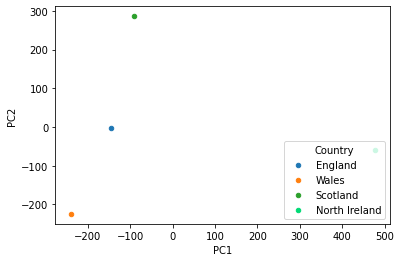

In [12]:
fig = plt.figure(figsize = (6, 4)) #전체 크기
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize = 10)
ax.set_ylabel('PC2', fontsize = 10)

Country = Ct
colors = ['#1F77B4', '#FF7F0E', '#2CA02C','#00da75']
for Country, color in zip(Country,colors):
    indicesToKeep = df['Country'] == Country
    ax.scatter(pcadf.loc[indicesToKeep, 'pc1']
               , pcadf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 20)

ax.legend(Ct,loc = 4,title = 'Country',fontsize = 10)  #범례
#ax.grid()  #그리드
print(ax)

## 7. 아래 데이터에 대해 k-means clustering을 적용 후, 결과를 그래프로 그리세요.



In [13]:
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457
...,...,...
195,-3.560689,4.567320
196,5.051216,4.745086
197,6.127624,4.285188
198,-1.783078,-8.890394


In [43]:
dataset_centroid_x = points.x.mean()
dataset_centroid_y = points.y.mean()
print(dataset_centroid_x, dataset_centroid_y)

-2.32329816340267 -3.4228690080745237


In [29]:
centroids = points.sample(5) # k-means with 5 cluster
centroids

,x,y
111,6.063252,3.253716
179,-7.262219,-4.399703
80,-4.038187,4.599801
77,-4.189971,-7.659077
94,-0.337498,-10.884813


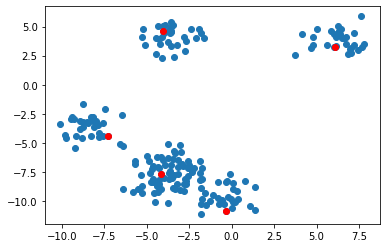

In [30]:
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
for i in range(5):
  ax.plot(centroids.iloc[i].x, centroids.iloc[i].y, "or")

In [31]:
import math
import numpy as np
from scipy.spatial import distance

def find_nearest_centroid(df, centroids, iteration):
 
  # 포인트와 centroid 간의 거리 계산
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # 제일 근접한 centroid 선택
  nearest_centroids = np.argmin(distances, axis = 1)
    
  # cluster 할당
  se = pd.Series(nearest_centroids)
  df['cluster_' + iteration] = se.values
  
  return df

In [32]:
first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

,x,y,cluster_1
0,-7.846803,-3.421277,1
1,-3.554323,-6.884729,3
2,-0.192822,-9.671030,4
3,-6.401456,-5.223972,1
4,-0.804026,-9.704457,4


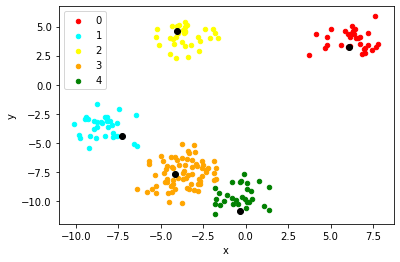

In [33]:
def plot_clusters(df, column_header, centroids):
  colors = {0 : 'red', 1 : 'cyan', 2 : 'yellow',3 : 'orange', 4 : 'green'}
  fig, ax = plt.subplots()
  for i in range(5):
    ax.plot(centroids.iloc[i].x, centroids.iloc[i].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
  plt.show()
  
plot_clusters(first_pass, 'cluster_1', centroids)

In [34]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(first_pass, 'cluster_1')
centroids

,x,y
cluster_1,,
0,6.249793,3.844572
1,-8.366530,-3.612381
2,-3.597407,4.133441
3,-3.725170,-7.621064
4,-0.386860,-9.584803


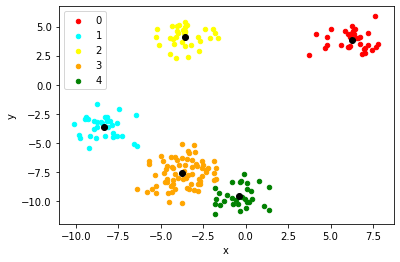

In [35]:
# 변경된 cluster에 대해 centroid 계산
centroids = get_centroids(first_pass, 'cluster_1')

second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

plot_clusters(second_pass, 'cluster_2', centroids)

In [36]:
# 유의미한 차이가 없을 때 까지 반복
convergence = np.array_equal(first_pass['cluster_1'], second_pass['cluster_2'])
convergence

True

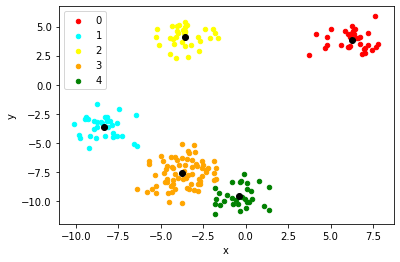

In [37]:
centroids = get_centroids(second_pass, 'cluster_2')

third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

plot_clusters(third_pass, 'cluster_3', centroids)

In [38]:
# 유의미한 차이가 없을 때 까지 반복
convergence = np.array_equal(second_pass['cluster_2'], third_pass['cluster_3'])
convergence

True

# SC 3점 요구사항:
위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들 중 하나를 만족하는 경우 3점을 얻을 수 있습니다.

아래 요구사항들은 모두 optional 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

- 6번의 PCA 결과에 대해서 Scree plot을 추가하세요.

- 7번에서 k값을 선택하는 과정을 논리적으로 설명하세요.


시각화를 통해 본 적정 군집수 : 5개의 군집으로 보임
Inertia value 를 이용한 적정 군집수 판단 : 4개?
곰곰히 생각해보니 5개까지는 괜찮겠구나 싶어서 5개로 K 값을 정함


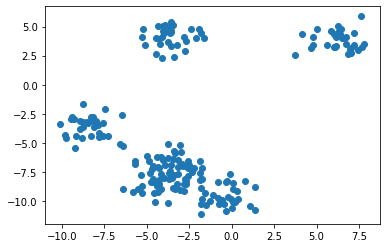

In [39]:
plt.scatter(points.x,points.y)

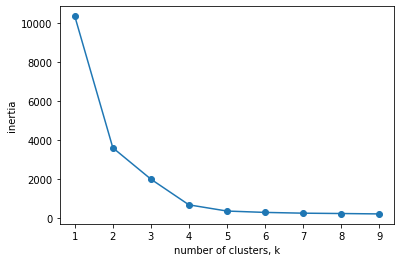

In [46]:
from sklearn.cluster import KMeans

ks = range(1,10)

inertias = []



for k in ks:

    model = KMeans(n_clusters=k)

    model.fit(points)

    inertias.append(model.inertia_)

    

# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

plt.show()